# Prova 1 - C210 - L2/L4

### Instruções
* Esta prova contém 3 questões sobre, respectivamente, Machine Learning, Algoritmos genéticos e PSO, cada uma pode possuir itens definidos por letras (a, b, c...)
* Esta prova deve ser feita INDIVIDUALMENTE, sem acesso a outros alunos
* É permitido o acesso SOMENTE aos códigos disponibilizados no Github da disciplina: https://github.com/Antonio-AV/C210_IA
* Para a realização da prova apenas altere este notebook
* Coloque seu nome completo como nome do notebook ao enviar
* Ao final, envie na tarefa criada no Teams apenas o notebook com as alterações
* Preencha o campo a seguir com suas informações

#### Boa prova!!!

##### Nome: 
##### Curso: 
##### Matrícula:  109


## 1- Machine Learning

Utilizando a função make_blobs apresentada em sala, crie um conjunto de dados que conte com 350 amostras, 2 características, com o número de centros igual ao último número de sua matrícula, por exemplo: matrícula = 98 -> n° de centros = 8, (caso o último número de sua matrícula seja 0 ou 1, utilize 5 como número de centros), espalhamento dos dados = 0.5 e com embaralhamento.

Após a criação do conjunto, utilize do método Kmeans para realizar o agrupamento (clusterização) desses dados, passando como número de grupos o próprio número de centros definido anteriormente com o auxílio de sua matícula,  e por fim mostre gráficamente como ficaram esses grupos e seus respectivos centros. 

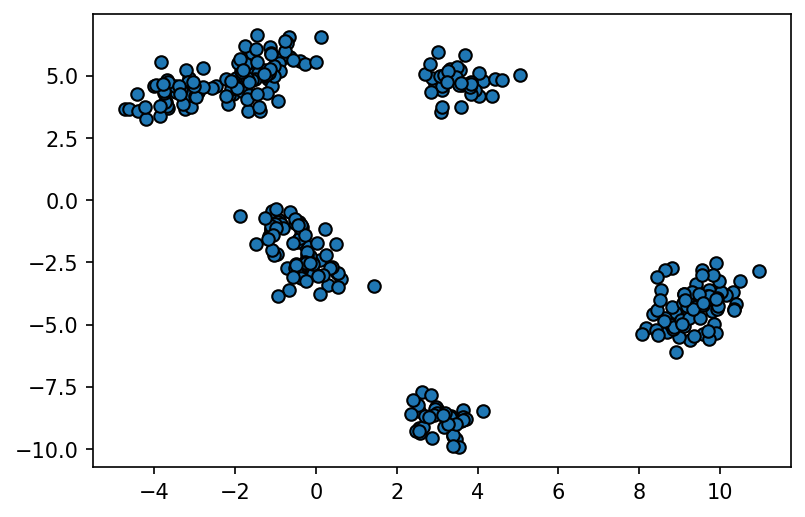

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

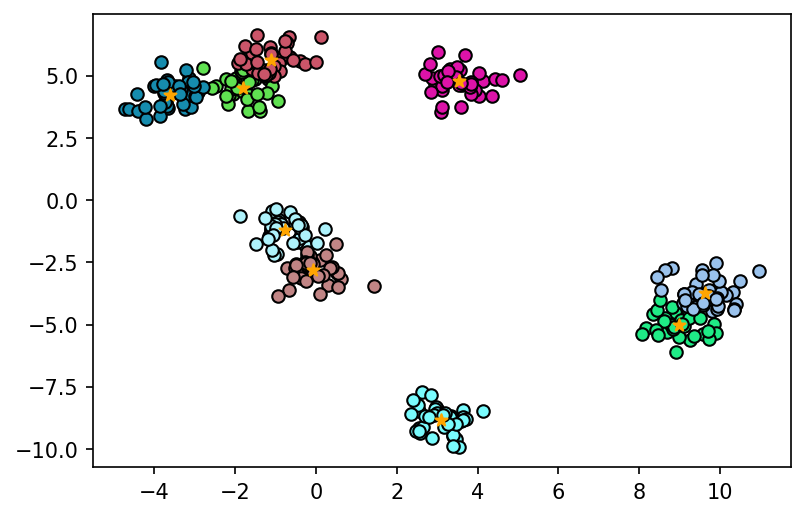

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

data, labels = make_blobs(n_samples=350, n_features=2, centers=9, cluster_std=0.5, shuffle=True)

plt.rcParams['figure.dpi'] = 150
plt.scatter(data[:, 0], data[:, 1], marker="o", edgecolors="black")
plt.show()

modelo = KMeans(n_clusters=9)
modelo.fit(data)

resposta = modelo.predict(data)

centros = modelo.cluster_centers_


plt.rcParams['figure.dpi'] = 150
for i in range(9):
    grupo_i = data[resposta == i]
    plt.scatter(grupo_i[:,0] ,grupo_i[:,1], c=np.random.rand(3), edgecolors=("black") )
    
plt.scatter(centros[:, 0], centros[:, 1], c="orange", label="Centros", marker="*")
plt.show()

## 2- Algoritmos genéticos

In [5]:
import random
############################################ BITSET ############################################
class BitSet:
    def __init__(self, size):
        self.bits = np.full((1, size), False)

    def get(self, index):
        return self.bits[0, index]

    def set(self, index, value):
        self.bits[0, index] = value

    def flip(self, index):
        self.bits[0, index] = not self.bits[0, index]

    def debug(self):
        print(self.bits)
        
############################################ CROMOSSOMO ############################################
class Chromossome:
    def __init__(self, x = None, y = None):
        if x == None:
            x = random.randint(-15, 15)

        if y == None:
            y = random.randint(-15, 15)

        self.__genes = Chromossome.get_genotype(x, y)

    def get_genes(self):
        return self.__genes

    def set_genes(self, genes):
        self.__genes = genes

    def to_string(self):
        chr_str = "G = ["

        for i in range(10):
            chr_str += (i == 5 and " " or "") + (self.__genes.get(i) and "1" or "0")

        x, y = Chromossome.get_fenotype(self.__genes)

        chr_str += "], F = [" + str(x) + ", " + str(y) + "]"

        return chr_str

    @staticmethod
    def get_genotype(x, y):
        bits = BitSet(10)

        xy_binary = "{:05b}".format(x) + "{:05b}".format(y)

        for i in range(10):
            bits.set(i, xy_binary[i] == '1')

        return bits

    @staticmethod
    def get_fenotype(genes):
        x = (8 * genes.get(0) +
            4 * genes.get(1) +
            2 * genes.get(2) +
            1 * genes.get(3))

        if (genes.get(4) == 1):
            x *= -1

        y = (8 * genes.get(5) +
            4 * genes.get(6) +
            2 * genes.get(7) +
            1 * genes.get(8))

        if (genes.get(9) == 1):
            y *= -1

        return x, y
    
############################################ PROBLEMA ############################################
class Problem:

    @staticmethod
    def f(x, y):
        return x**2 + 9 * y**2

    @staticmethod
    def f_chromossome(chromossome):
        x, y = Chromossome.get_fenotype(chromossome.get_genes())
        return Problem.f(x, y)

    @staticmethod
    def g(x, y):
        return 1 / (1 + Problem.f(x, y))

    @staticmethod
    def g_chromossome(chromossome):
        x, y = Chromossome.get_fenotype(chromossome.get_genes())
        return Problem.g(x, y)

    @staticmethod
    def f_average(population):
        avg = 0
        for chromossome in population:
            avg += Problem.f_chromossome(chromossome)
        avg /= len(population)
        return avg

    @staticmethod
    def g_average(population):
        avg = 0
        for chromossome in population:
            avg += Problem.g_chromossome(chromossome)
        avg /= len(population)
        return avg
    
############################################ UTILITÁRIOS ############################################
class GeneticUtils:

    @staticmethod
    def find_best_chromossome(population):
        best_chromossome = None

        for chromossome in population:
            score = Problem.g_chromossome(chromossome)

            if best_chromossome is None or score > Problem.g_chromossome(best_chromossome):
                best_chromossome = chromossome

        return best_chromossome

    @staticmethod
    def find_worst_chromossome(population):
        worst_chromossome = None

        for chromossome in population:
            score = Problem.g_chromossome(chromossome)

            if worst_chromossome is None or score < Problem.g_chromossome(worst_chromossome):
                worst_chromossome = chromossome

        return worst_chromossome

    @staticmethod
    def format_chromossome(chromossome):
        return f"{chromossome.to_string()}, Score = {Problem.g_chromossome(chromossome):.3f}"

In [8]:
############################################ OPERADORES GENÉTICOS ############################################
class GeneticOperators:

    MUTATION_PROBABILITY = 0.05

    @staticmethod
    def selection(population):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        parent3 = random.choice(population)
        
        pais = []
        
        pais.append(parent1)
        pais.append(parent2)
        pais.append(parent3)
        
        for p in pais:
            print(GeneticUtils.format_chromossome(p))
            
        melhores = []
        
        for _ in range(2):
            melhor = GeneticUtils.find_best_chromossome(pais)
            melhores.append(melhor)
            pais.remove(melhor)

        print(f"1st parent chosen for crossover: {GeneticUtils.format_chromossome(melhores[0])}")
        print(f"2nd parent chosen for crossover: {GeneticUtils.format_chromossome(melhores[1])}")

        return melhores[0], melhores[1]

    @staticmethod
    def crossover(population, parent1, parent2):
        crossover_point = random.randint(1, 9)
        print(f"Crossover will happen at point {crossover_point}")

        parent1_genes = parent1.get_genes()
        parent2_genes = parent2.get_genes()

        child1_genes = BitSet(10)
        child2_genes = BitSet(10)

        for i in range(crossover_point):
            child1_genes.set(i, parent2_genes.get(i))
            child2_genes.set(i, parent1_genes.get(i))

        for i in range(crossover_point, 10):
            child1_genes.set(i, parent1_genes.get(i))
            child2_genes.set(i, parent2_genes.get(i))

        child1 = Chromossome()
        child1.set_genes(child1_genes)
        print(f"1st child generated from crossover: {GeneticUtils.format_chromossome(child1)}")

        child2 = Chromossome()
        child2.set_genes(child2_genes)
        print(f"2nd child generated from crossover: {GeneticUtils.format_chromossome(child2)}")
        
        population.append(child1)
        population.append(child2)
        
    @staticmethod
    def mutation(population):
        prob = random.uniform(0, 1)

        if prob >= GeneticOperators.MUTATION_PROBABILITY:
            return

        target = random.choice(population)

        mutation_point = random.randint(0, 9)
        print(f"Individual {target.to_string()} will mutate at point {mutation_point}")

        genes = target.get_genes()
        genes.flip(mutation_point)

        print(f"Individual {target.to_string()} mutated at point {mutation_point}")

    @staticmethod
    def elitism(population):
        for _ in range(2):
            worst_individual = GeneticUtils.find_worst_chromossome(population)
            print(f"Removing worst individual from population: {GeneticUtils.format_chromossome(worst_individual)}")
            population.remove(worst_individual)

In [9]:
############################################ MAIN ############################################
if __name__ == "__main__":
    population = []
    for _ in range(30):
        population.append(Chromossome())

    generation = 0
    population_score = Problem.g_average(population)


    while generation < 50:
        parent1, parent2 = GeneticOperators.selection(population)

        GeneticOperators.crossover(population, parent1, parent2)
        GeneticOperators.mutation(population)
        GeneticOperators.elitism(population)

        generation += 1
        population_score = Problem.g_average(population)


        print(f"Generation # {generation} -> Average population score = {population_score:.3f}\n")

    best_chromossome = GeneticUtils.find_best_chromossome(population)
    print(f"Best individual: {GeneticUtils.format_chromossome(best_chromossome)}")

G = [00111 00010], F = [-3, 1], Score = 0.053
G = [00001 00101], F = [0, -2], Score = 0.027
G = [01101 01111], F = [-6, -7], Score = 0.002
1st parent chosen for crossover: G = [00111 00010], F = [-3, 1], Score = 0.053
2nd parent chosen for crossover: G = [00001 00101], F = [0, -2], Score = 0.027
Crossover will happen at point 2
1st child generated from crossover: G = [00111 00010], F = [-3, 1], Score = 0.053
2nd child generated from crossover: G = [00001 00101], F = [0, -2], Score = 0.027
Removing worst individual from population: G = [01100 01111], F = [6, -7], Score = 0.002
Removing worst individual from population: G = [01101 01111], F = [-6, -7], Score = 0.002
Generation # 1 -> Average population score = 0.075

G = [00011 00011], F = [-1, -1], Score = 0.091
G = [01111 01010], F = [-7, 5], Score = 0.004
G = [01111 00111], F = [-7, -3], Score = 0.008
1st parent chosen for crossover: G = [00011 00011], F = [-1, -1], Score = 0.091
2nd parent chosen for crossover: G = [01111 00111], F =

Removing worst individual from population: G = [00011 00011], F = [-1, -1], Score = 0.091
Removing worst individual from population: G = [00011 00010], F = [-1, 1], Score = 0.091
Generation # 21 -> Average population score = 0.520

G = [00100 00000], F = [2, 0], Score = 0.200
G = [00001 00011], F = [0, -1], Score = 0.100
G = [00100 00000], F = [2, 0], Score = 0.200
1st parent chosen for crossover: G = [00100 00000], F = [2, 0], Score = 0.200
2nd parent chosen for crossover: G = [00100 00000], F = [2, 0], Score = 0.200
Crossover will happen at point 1
1st child generated from crossover: G = [00100 00000], F = [2, 0], Score = 0.200
2nd child generated from crossover: G = [00100 00000], F = [2, 0], Score = 0.200
Removing worst individual from population: G = [00011 00011], F = [-1, -1], Score = 0.091
Removing worst individual from population: G = [00111 00001], F = [-3, 0], Score = 0.100
Generation # 22 -> Average population score = 0.527

G = [00100 00000], F = [2, 0], Score = 0.200
G = 

Removing worst individual from population: G = [00001 00000], F = [0, 0], Score = 1.000
Removing worst individual from population: G = [00000 00000], F = [0, 0], Score = 1.000
Generation # 48 -> Average population score = 1.000

G = [00001 00000], F = [0, 0], Score = 1.000
G = [00001 00001], F = [0, 0], Score = 1.000
G = [00001 00001], F = [0, 0], Score = 1.000
1st parent chosen for crossover: G = [00001 00000], F = [0, 0], Score = 1.000
2nd parent chosen for crossover: G = [00001 00001], F = [0, 0], Score = 1.000
Crossover will happen at point 3
1st child generated from crossover: G = [00001 00000], F = [0, 0], Score = 1.000
2nd child generated from crossover: G = [00001 00001], F = [0, 0], Score = 1.000
Removing worst individual from population: G = [00001 00000], F = [0, 0], Score = 1.000
Removing worst individual from population: G = [00001 00000], F = [0, 0], Score = 1.000
Generation # 49 -> Average population score = 1.000

G = [00001 00000], F = [0, 0], Score = 1.000
G = [00001 

#### A) Na classe Problema, altere a função objetivo para: a * x^2 + b * y^2 , onde 'a' deve ser o primeiro dígito da sua matrícula e 'b' o último digito da sua matrícula. (Caso o último número seja 0, use 1 ao invés)
#### Ex: Se sua matrícula for 123, 'a'  será 1 e 'b' será 3, então sua função objetivo deve ser  1 * x^2 + 3 * y^2 

___

##### B) Altere a seleção dos pais de modo a selecionar 3 pais de forma aleatória e, dentre os 3 pais selecionados, utilizar apenas os dois melhores para gerar novos filhos

___

##### C) No método de crossover, da classe de Operadores Genéticos, altere a geração dos dois filhos. O filho 1 deve ter os primeiros genes do pai 2, e após o ponto de crossover, do pai 1. Enquanto o filho 2 deve ter os primeiros genes do pai 1, e após o ponto de crossover, do pai 2. 

## 3- PSO

Na implementação do algoritmo The Cornfield Vector são levados em consideração os valores de pbest, gbest e um "fator de craziness" no momento da atualização da velocidade da partícula. Altere no código abaixo os valores de w, c1 e c2, de modo que o valor do "fator de inércia" seja igual a 0.3, a influência do número aleatório r2 seja de 0.5 e a influência do número aleatório r1 seja de 0.1. 

In [ ]:
 def update_velocity(self, gbest_pos):
        '''
        Atualiza a velocidade com base em um "fator de craziness", o pbest e o gbest
        '''
        w = 0.3
        c1 = 0.5
        c2 = 0.1

        for i in range(0, self.num_dimensions):
            r1 = random.random()
            r2 = random.random()

            vel_cognitive = c1 * r1 * (self.pbest_pos[i] - self.position[i])
            vel_social = c2 * r2 * (gbest_pos[i] - self.position[i])

            self.velocity[i] = w * self.velocity[i] + vel_cognitive + vel_social